In [1]:
import mlflow as mf
from pathlib import Path
import itertools
import pandas as pd
import numpy as np

In [2]:
mf.set_tracking_uri(str(Path('../code/train/mlruns').absolute()))

In [3]:
algs = ['lgb', 'svr','resnet1d','unet1d']
tars = ['SP','DP']
mets = ['me', 'std', 'mae', 'mase']
mets2 = [i+'_'+j for i, j in itertools.product(tars, mets)]
dbs = ['sensors', 'uci2', 'bcg', 'ppgbp']
dbs2 = ['sensors85', 'uci2', 'bcg', 'ppgbp']

db_cool = {'sensors':'Sensors', 'sensors85':'Sensors', 'uci2':'UCI', 'bcg':'BCG', 'ppgbp':'PPGBP'}
alg_cool = {'lgb': 'LightGBM', 'svr': 'SVR', 'resnet1d': 'ResNet', 'unet1d': 'U-Net'}

In [4]:
l_df= []
for db in dbs:
    df_metrics = pd.DataFrame(index=algs,columns=mets2)
    for alg in algs:
        if not(alg in ['resnet1d','spectroresnet','mlpbp','unet1d','ppgiabp']):
            for tar in tars:
                print(db, alg, tar)
                exp = mf.get_experiment_by_name(f'mix-{db}-{alg}-{tar}')
                if not(exp is None):
                    runs = mf.search_runs([exp.experiment_id])
                    runs = runs[runs['tags.mlflow.parentRunId'].isnull()].reset_index(drop=True)
                    runs = runs[runs.status=='FINISHED'].reset_index(drop=True)
                    if runs.shape[0] > 0:
                        cols1 = [tar+'_'+m for m in mets if m!='mase']
                        cols2 = ['metrics.ts/'+m for m in cols1]
                        df_metrics.loc[alg,cols1] = runs.iloc[0][cols2].values
                        df_metrics.loc[alg,f'{tar}_mase'] = runs.iloc[0][f'metrics.ts/{tar}_mae']/runs.iloc[0][f'metrics.nv/{tar}_mae'] *100
        else: 
            print(db, alg)
            exp = mf.get_experiment_by_name(f'mix-{db}-{alg}')
            if not(exp is None):
                runs = mf.search_runs([exp.experiment_id])
                runs = runs[runs['tags.mlflow.parentRunId'].isnull()].reset_index(drop=True)
                runs = runs[runs.status=='FINISHED'].reset_index(drop=True)
                if runs.shape[0] > 0:
                    cols1 = [i+'_'+j for i, j in itertools.product(tars, mets) if j != 'mase']
                    cols2 = ['metrics.test/'+m.replace('SP','sbp').replace('DP','dbp') for m in cols1]
                    
                    df_metrics.loc[alg,cols1] = runs.iloc[0][cols2].values
                    df_metrics.loc[alg,f'SP_mase'] = runs.iloc[0][f'metrics.test/sbp_mae']/runs.iloc[0][f'metrics.nv/sbp_mae'] *100
                    df_metrics.loc[alg,f'DP_mase'] = runs.iloc[0][f'metrics.test/dbp_mae']/runs.iloc[0][f'metrics.nv/dbp_mae'] *100
                
    df_metrics['dataset'] =  db_cool[db]
    df_metrics['exp'] = 'Leak'
    l_df.append(df_metrics)
df_metrics_mix = pd.concat(l_df)

sensors lgb SP
sensors lgb DP
sensors svr SP
sensors svr DP
sensors resnet1d
sensors unet1d
uci2 lgb SP
uci2 lgb DP
uci2 svr SP
uci2 svr DP
uci2 resnet1d
uci2 unet1d
bcg lgb SP
bcg lgb DP
bcg svr SP
bcg svr DP
bcg resnet1d
bcg unet1d
ppgbp lgb SP
ppgbp lgb DP
ppgbp svr SP
ppgbp svr DP
ppgbp resnet1d
ppgbp unet1d


In [5]:
l_df= []
for db in dbs2:
    df_metrics = pd.DataFrame(index=algs,columns=mets2)
    for alg in algs:
        if not(alg in ['resnet1d','spectroresnet','mlpbp','unet1d','ppgiabp','vnet']):
            for tar in tars:
                print(db, alg, tar)
                exp = mf.get_experiment_by_name(f'{db}-{alg}-{tar}')
                if not(exp is None):
                    runs = mf.search_runs([exp.experiment_id])
                    runs = runs[runs['tags.mlflow.parentRunId'].isnull()].reset_index(drop=True)
                    runs = runs[runs.status=='FINISHED'].reset_index(drop=True)
                    runs = runs[runs['tags.mlflow.source.name']=='train.py'].reset_index(drop=True)
                    if runs.shape[0] > 0:
                        cols1 = [tar+'_'+m for m in mets if m!='mase']
                        cols2 = ['metrics.ts/'+m for m in cols1]
                        df_metrics.loc[alg,cols1] = runs.iloc[0][cols2].values
                        df_metrics.loc[alg,f'{tar}_mase'] = runs.iloc[0][f'metrics.ts/{tar}_mae']/runs.iloc[0][f'metrics.nv/{tar}_mae'] *100
        else: 
            print(db, alg)
            exp = mf.get_experiment_by_name(f'{db}-{alg}')
            if not(exp is None):
                runs = mf.search_runs([exp.experiment_id])
                runs = runs[runs['tags.mlflow.parentRunId'].isnull()].reset_index(drop=True)
                runs = runs[runs.status=='FINISHED'].reset_index(drop=True)
                runs = runs[runs['tags.mlflow.source.name']=='train.py'].reset_index(drop=True)
                if runs.shape[0] > 0:
                    cols1 = [i+'_'+j for i, j in itertools.product(tars, mets) if j != 'mase']
                    cols2 = ['metrics.test/'+m.replace('SP','sbp').replace('DP','dbp') for m in cols1]
                    
                    df_metrics.loc[alg,cols1] = runs.iloc[0][cols2].values
                    df_metrics.loc[alg,f'SP_mase'] = runs.iloc[0][f'metrics.test/sbp_mae']/runs.iloc[0][f'metrics.nv/sbp_mae'] *100
                    df_metrics.loc[alg,f'DP_mase'] = runs.iloc[0][f'metrics.test/dbp_mae']/runs.iloc[0][f'metrics.nv/dbp_mae'] *100
    df_metrics['dataset'] =  db_cool[db]
    df_metrics['exp'] = 'No leak'
    l_df.append(df_metrics)
df_metrics_no_mix = pd.concat(l_df)

sensors85 lgb SP
sensors85 lgb DP
sensors85 svr SP
sensors85 svr DP
sensors85 resnet1d
sensors85 unet1d
uci2 lgb SP
uci2 lgb DP
uci2 svr SP
uci2 svr DP
uci2 resnet1d
uci2 unet1d
bcg lgb SP
bcg lgb DP
bcg svr SP
bcg svr DP
bcg resnet1d
bcg unet1d
ppgbp lgb SP
ppgbp lgb DP
ppgbp svr SP
ppgbp svr DP
ppgbp resnet1d
ppgbp unet1d


In [6]:
df_metrics_mix = df_metrics_mix.reset_index().rename(columns={'index':'alg'})
df_metrics_no_mix = df_metrics_no_mix.reset_index().rename(columns={'index':'alg'})

df_metrics_mix['alg'] = df_metrics_mix.alg.map(lambda a: alg_cool[a])
df_metrics_no_mix['alg'] = df_metrics_no_mix.alg.map(lambda a: alg_cool[a])

In [8]:
l = []
for i in range(df_metrics_no_mix.shape[0]):
    l.append(df_metrics_no_mix.iloc[i].values)
    l.append(df_metrics_mix.iloc[i].values)

In [9]:
df = pd.DataFrame(l, columns = ['alg', 'ME_0', 'SD_0', 'MAE_0', 'MASE_0', 'ME_1', 'SD_1', 'MAE_1', 'MASE_1', 'dataset', 'exp']).dropna()

In [10]:
import numpy as np
import matplotlib.pyplot as plt


def tick_function(X):
    V = 1/(1+X)
    return ["%.3f" % z for z in V]

def plot_bar(df_tmp, bp_type='SBP', mase_mae='MASE', me_ylim=(-30,30), mase_ylim=(-110,110), nb_ticks=8, savepath=''):
    import matplotlib.ticker as ticker
    
    bp = 0 if bp_type=='SBP' else 1
    fig = plt.figure(figsize=(20, 5))
    fig.tight_layout()
    N = 3
    ind = np.arange(N)  # the x locations for the groups
    width = 0.1         # the width of the bars
    add_space = 0.2     # the additional space between metrics
    data_space = 0.5    # the additional space between datasets
    new_tick_locations = np.array([2,5,8,10])
    datasets = ['Sensors', 'UCI', 'BCG', 'PPGBP']
    legend_label = ('ME$\pm$SD of No Leak','ME$\pm$SD of Leak', 'MASE of No Leak', 'MASE of Leak')
    fontsize = 14       # the fontsize of all the text in the plot
    nb_ticks = nb_ticks # number of ticks shown in y-axis
    colors = [plt.cm.tab20(0), plt.cm.tab20(1), plt.cm.tab20(2), plt.cm.tab20(3)]
    ax = fig.add_subplot(111)

    for i, ds in enumerate(datasets):
        ind_tmp = ind + i*(N+data_space)
        if ds=='PPGBP': ind_tmp = ind_tmp[:-1]
        met_df = df_tmp[(df_tmp.dataset==ds) & (df_tmp.alg!='Naive')]

        leak_mase = met_df[met_df.exp=='Leak'][f'{mase_mae}_{bp}'].values
        leak_me = met_df[met_df.exp=='Leak'][f'ME_{bp}'].values
        leak_std = met_df[met_df.exp=='Leak'][f'SD_{bp}'].values

        nleak_mase = met_df[met_df.exp=='No leak'][f'{mase_mae}_{bp}'].values
        nleak_me = met_df[met_df.exp=='No leak'][f'ME_{bp}'].values
        nleak_std = met_df[met_df.exp=='No leak'][f'SD_{bp}'].values

        
        rects2 = ax.bar(ind_tmp, nleak_me, width, color=colors[0], yerr=nleak_std, ecolor=colors[0])
        rects1 = ax.bar(ind_tmp+width, leak_me, width, color=colors[1], yerr=leak_std, ecolor=colors[1])
        ax.tick_params(axis='y', color=colors[0], labelcolor=colors[0])
        ax.yaxis.label.set_color(colors[0])
        ax.set_ylabel('ME$\pm$SD', fontsize=fontsize)
        ax.yaxis.set_tick_params(labelsize=fontsize)
        ax.set_ylim(me_ylim[0], me_ylim[1])
        ax.yaxis.set_major_locator(plt.MaxNLocator(nb_ticks))
        
        ax2 = ax.twinx()
        
        rects4 = ax2.bar(ind_tmp+width+add_space, nleak_mase, width, color=colors[2])
        rects3 = ax2.bar(ind_tmp+width+add_space+width, leak_mase, width, color=colors[3])
        ax2.set_ylim(mase_ylim[0], mase_ylim[1])
        ax2.tick_params(axis='y', color=colors[2], labelcolor=colors[2],)
        ax2.yaxis.label.set_color(colors[2])
        ax2.set_ylabel('MASE (%)', fontsize=fontsize)
        ax2.yaxis.set_tick_params(labelsize=fontsize)
        ax2.yaxis.set_major_locator(plt.MaxNLocator(nb_ticks))
        
    loc = []
    for i in range(N+1):
        i_tmp = i+i*(N)-(width+add_space*2)*i
        loc+=[i_tmp+width, 1+i_tmp+width+add_space/2, 2+i_tmp+width+add_space/2]  
    ax.set_xticks(loc[:-1]) # exclude ppgbp Unet
    ax.set_xticklabels( (['Feat2Lab\n(LightGBM)', 'Sig2Lab\n(ResNet)', 'Sig2Sig\n(U-Net)']*4)[:-1] , fontsize=fontsize)

    ax.legend( (rects2[0],rects1[0], rects4[0],rects3[0]), legend_label,
            loc='lower center', fancybox=False, shadow=False, ncol=5, fontsize=fontsize, frameon=False)


    #%% Add the dataset axis
    # Move twinned axis ticks and label from top to bottom
    ax3 = ax.twiny()
    ax3.set_xlim(ax.get_xlim())
    
    # Get the x location for datasets
    new_loc = []
    for i in range(len(loc)//3):
        if i==len(loc)//3-1:
            new_loc.append(np.mean(loc[-3:-1]))
        else:
            new_loc.append(loc[i*3+1])
    
    ax3.set_xticks(new_loc)
    ax3.set_xticklabels(datasets)
    ax3.spines["bottom"].set_position(("axes", -0.18))
    ax3.tick_params(axis='x', bottom=False, labelbottom=False, length=0, labelsize=fontsize)
    
    ax3.xaxis.set_ticks_position("bottom")
    ax3.xaxis.set_label_position("bottom")
    
    
    #%% Add the small ticks between the datasets 
    ax4 = ax.twiny()
    ax4.set_xlim(ax.get_xlim())
    # Get the x location for separating datasets
    sep_loc = []
    for i in range(1, len(loc)//3):
        sep_loc.append(np.mean(loc[i*3-1: i*3+1]))
            
    ax4.set_xticks(sep_loc)
    ax4.xaxis.set_ticks_position("bottom")
    ax4.tick_params(axis='x', labelbottom=False, length=14, direction="inout")
    # ax4.xaxis.set_label(invi)
    if len(savepath)>0:
        plt.savefig(f'./{savepath}.pdf', format='pdf', dpi=300, bbox_inches='tight')

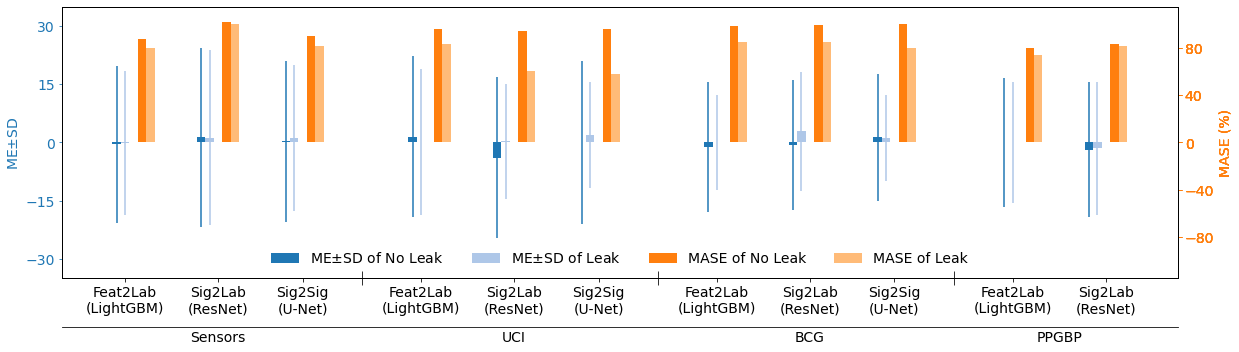

In [11]:
plot_bar(df[df['alg']!='SVR'], bp_type='SBP', me_ylim=(-35, 35), mase_ylim=(-115,115), nb_ticks=6, savepath='fig-BP/sbp_leak')

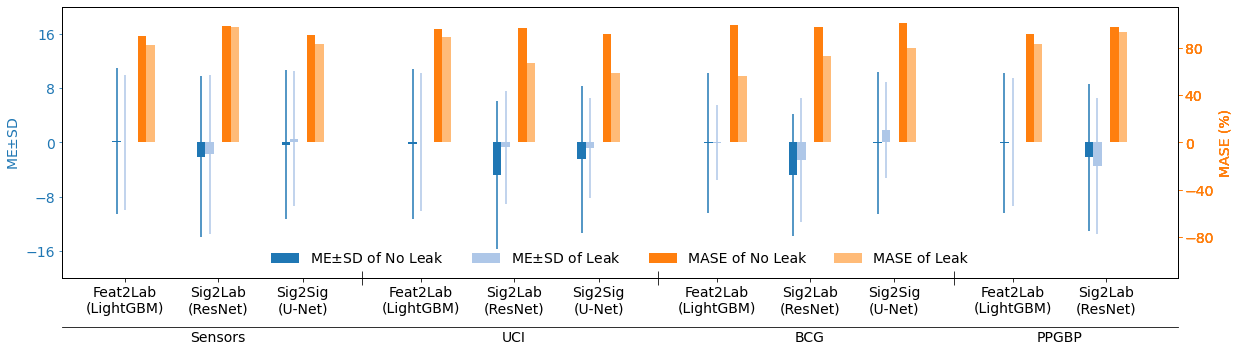

In [12]:
plot_bar(df[df['alg']!='SVR'], bp_type='DBP', me_ylim=(-20, 20), mase_ylim=(-115,115), nb_ticks=6, savepath='fig-BP/dbp_leak')